In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

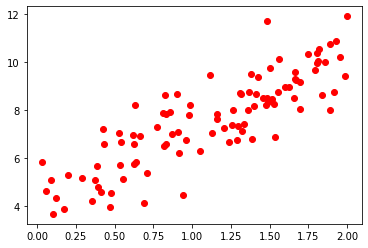

In [ ]:
plt.scatter(X, y, color='red')
plt.show()

### Using Normal Equation Method

In [ ]:
X_b = np.c_[np.ones((m, 1)), X] # adding x0 = 1 to each dataset
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
print(theta_best)

[[4.31590271]
 [2.94065936]]


In [ ]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new] # adding x0 = 1 to each dataset
print(X_new_b)
y_predict = X_new_b.dot(theta_best)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


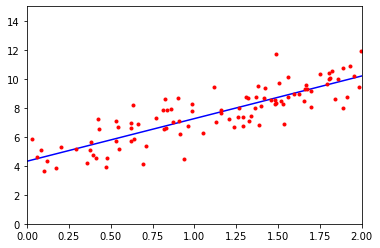

In [ ]:
plt.plot(X_new, y_predict, "b-")
plt.plot(X, y, 'r.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
print(np.ones((5,1)))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### Using Batch Gradient Descent

In [ ]:
alpha = 0.1
n_iterations = 1000
theta = np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - alpha*gradients

In [ ]:
print(theta)

[[4.31590271]
 [2.94065936]]


### Using Stochastic Gradient Descent

#### Raw Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return(t0/(t+t1))

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    xi = X_b[i:i+1] #Note: X_b[i] and X_b[i:i+1] are different
    yi = y[i:i+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    alpha = learning_schedule(epoch * m + i)
    theta = theta - alpha * gradients

In [ ]:
print(theta)

[[4.31074716]
 [2.93810981]]


#### Using Stochastic Gradient Descent from sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-4, penalty=None, eta0=0.1)#Penalty for regularization
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
print(sgd_regressor.coef_,sgd_regressor.intercept_)

[3.0800792] [4.25955991]


### Using Mini-batch Gradient Descent

### Using sklearn

### Numpy

In [ ]:
a = np.array([1, 2, 3])        # Create a rank 1 array
print(type(a))                 # Prints "<class 'numpy.ndarray'>"
print(a.shape)                 # Prints (3,)
print(a[0])

b = np.array([[1,2,3],[4,5,6]])# Create a rank 2 array
print(b.shape)                 # Prints "(2, 3)"
print(b[0])                    # Prints [1 2 3] <--- Rank 1
print(b[0:1])                  # Prints [[1 2 3]] <--- Rank 2

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
[1 2 3]
[[1 2 3]]
